In [65]:
#importing neccessary librabries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [66]:
df_MLE_USA = df[(df['job_title_short'] == 'Machine Learning Engineer') & (df['job_country'] == 'United States')].copy()

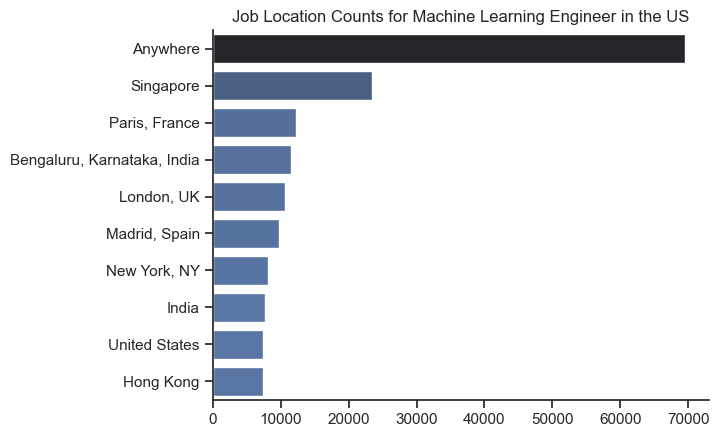

In [67]:
df_plot = df['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Job Location Counts for Machine Learning Engineer in the US')
plt.xlabel('')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

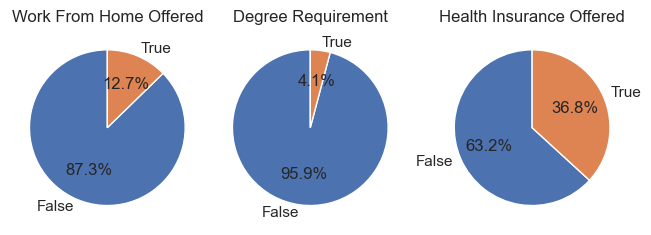

In [68]:
dict_columns = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, constrained_layout =True)

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_MLE_USA[column].value_counts().reindex([False, True]), labels= ['False', 'True'], autopct='%.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

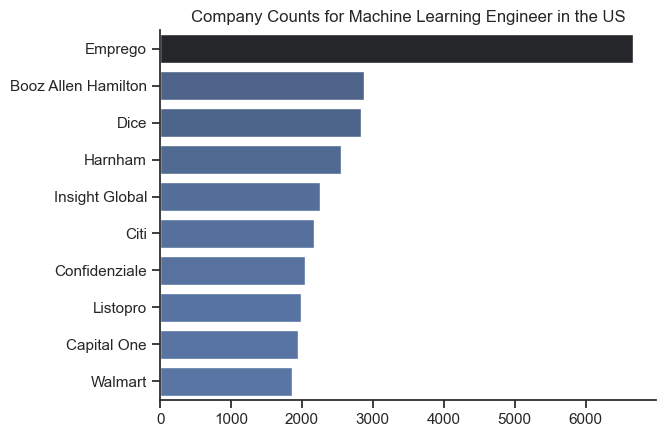

In [69]:
df_plot = df['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Company Counts for Machine Learning Engineer in the US')
plt.xlabel('')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()